> NLP on `BiTransSciencia [https://bitranssciencia.sourceforge.io]` text

In [343]:
import random
import requests
import numpy as np
import gensim
import gensim.downloader as api
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [344]:
np.random.seed(0)


In [345]:
print(gensim.__version__)
print(list(gensim.downloader.info()['models'].keys()))

4.3.1
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [346]:
kv__bts = api.load('glove-wiki-gigaword-300')
kv__bts.save('kv__bitranssciencia.kv')
kv__bts = KeyedVectors.load('kv__bitranssciencia.kv')

In [347]:
print(type(kv__bts))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [348]:
# tc__bts : TextCorpus - BiTransSciencia

with open("txt__bitranssciencia.txt","r") as f:
    tc__bts = " ".join(f.readlines()).replace("\n","").split(" ")

text_tokens = [sent.split() for sent in tc__bts]

print(text_tokens[0:8])
print(len(text_tokens))
wv__bts = Word2Vec(text_tokens,min_count=1)
print(len(wv__bts.wv['BiTransSciencia']))
print(wv__bts.wv['BiTransSciencia'])

print(wv__bts.wv.most_similar('BiTransSciencia'))
print(wv__bts.wv.most_similar('UniPolySciencia'))
print(wv__bts.wv.most_similar('K.V.N.Aditya'))

[['-------------------'], [], ['-'], [], [], ['logo'], ['081'], []]
3978


100
[-3.0248307e-03  9.3309032e-03  9.8337494e-03 -3.0718328e-04
 -8.7548736e-03 -8.1159053e-03  9.2380224e-03  2.7877700e-03
 -5.4650963e-03 -8.7234462e-03  5.6827366e-03 -7.1486519e-03
  2.3735024e-03 -5.3791199e-03 -7.8951176e-03 -8.4290421e-03
  1.3910389e-03 -6.2378920e-03 -9.3016317e-03 -6.5452494e-03
 -6.2810006e-03 -1.8554807e-04  2.7685142e-03 -4.4720806e-03
  5.3193094e-03  8.7917009e-03  1.0244882e-03 -1.5053010e-03
 -7.4503217e-03 -2.9399752e-04 -6.1715888e-03  4.4463240e-03
  7.5585698e-03 -2.8223575e-03  5.9959316e-03  6.5723862e-03
  8.5036121e-03 -5.8156491e-04 -6.7710769e-03 -5.7229591e-03
 -5.8049117e-03 -4.5876787e-03  3.4171534e-03  4.0596998e-03
  1.5041220e-03  9.3530277e-03 -4.2381790e-03  8.2498787e-05
  9.6690860e-03  6.8841837e-03  8.3253980e-03 -2.7646208e-03
  3.6056340e-03 -4.8979986e-03 -9.2530111e-03  3.1051326e-03
  7.3668049e-03 -5.2755154e-03 -2.6424695e-03 -8.3905458e-03
 -8.8384077e-03 -8.3790778e-04  6.6199661e-03 -9.9977506e-03
  6.8531977e-03 -2.0

In [349]:
pairs = [
    ('BiTransSciencia', 'BiTransSciencia'),
    ('BiTransSciencia', 'UniPolySciencia'),
    ('BiTransSciencia', 'K.V.N.Aditya'),
    ('BiTransSciencia', 'Data'),
    ('BiTransSciencia', 'Transmission'),
    ('Data', 'Transmission'),
    ('Data','0'),
    ('Data','1'),
    ('Transmission','8')
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv__bts.wv.similarity(w1, w2)))

'BiTransSciencia'	'BiTransSciencia'	1.00
'BiTransSciencia'	'UniPolySciencia'	-0.13
'BiTransSciencia'	'K.V.N.Aditya'	0.04
'BiTransSciencia'	'Data'	-0.05
'BiTransSciencia'	'Transmission'	-0.13
'Data'	'Transmission'	-0.04
'Data'	'0'	0.04
'Data'	'1'	-0.05
'Transmission'	'8'	0.06


In [350]:
print(wv__bts.wv.most_similar("BiTransSciencia",topn=8))
print(wv__bts.wv.most_similar(positive=['BiTransSciencia', 'UniPolySciencia'], topn=8))
print(wv__bts.wv.most_similar(positive=['BiTransSciencia', 'UniPolySciencia'], negative=['K.V.N.Aditya'], topn=8))

[("'White'", 0.2966705858707428), ('two(2)', 0.2758786380290985), ("'UniPolySciencia')", 0.27385464310646057), ('molecule(s)', 0.2661903500556946), ('not', 0.2649172246456146), ('both', 0.2617654800415039), ('role', 0.2614387571811676), ('names,', 0.2587887942790985)]
[('(generally', 0.3543097972869873), ('role', 0.2845248579978943), ('any/all', 0.27922120690345764), ("'White'", 0.2635137140750885), ('per', 0.25992104411125183), ('_"."', 0.2546951174736023), ('of', 0.24797175824642181), ("'UniPolySciencia')", 0.24425438046455383)]
[('inspired', 0.294478178024292), ("'_", 0.27610528469085693), ('".".', 0.2702725827693939), ("'K.V.N.Aditya'.", 0.2680596113204956), ("(Mouse,Keyboard,Speakers,Monitor,etc...)'", 0.2559649348258972), ('_"."', 0.25314033031463623), ('(generally', 0.2460770308971405), ("'#'", 0.2387358844280243)]


In [351]:
lst__words = ['BiTransSciencia', 'UniPolySciencia', 'K.V.N.Aditya', 'Data','Transmission','0','8','1','Particle','Molecule']
lst__wvs =  np.array([wv__bts.wv[lst_word] for lst_word in lst__words])
pca = PCA(n_components=2)
op = pca.fit_transform(lst__wvs)

print(op)

[[-0.02405556 -0.02569508]
 [ 0.02250661  0.03194248]
 [-0.01686476  0.02786158]
 [ 0.01239559 -0.01683111]
 [ 0.03367046  0.00757658]
 [-0.02478245  0.01366519]
 [ 0.0299018  -0.02466539]
 [-0.02141854 -0.02297122]
 [ 0.0046862  -0.0088396 ]
 [-0.01603934  0.01795655]]


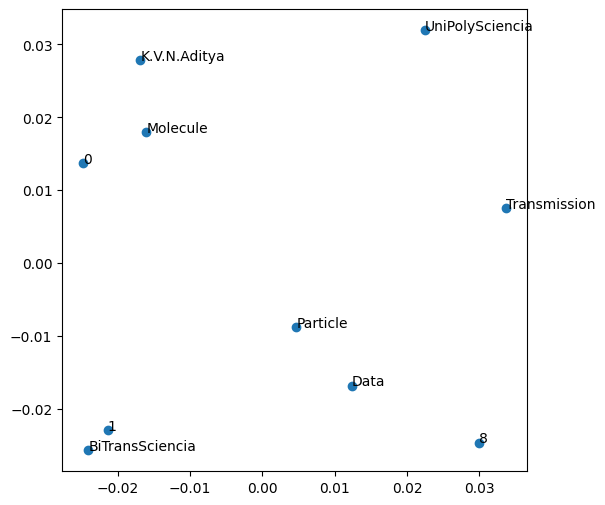

In [352]:
plt.figure(figsize=(6,6))
plt.scatter(op[:,0], op[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(op[i, 0], op[i, 1]))
plt.show()